<a href="https://colab.research.google.com/github/kskola/fraud-prediction/blob/main/Copy_of_Fraud_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

df = pd.read_csv('/content/fraudTest.csv')
df.dropna(inplace=True)

In [ ]:
df_model = df.drop(columns=['trans_date_trans_time', 'lat', 'long'])
df_model

,date,time,category,amt,gender,city,state,zip,city_pop,job,is_fraud
0,21/06/2020,12:14:25,personal_care,2.86,M,Columbia,SC,29209.0,333497.0,Mechanical engineer,0.0
1,21/06/2020,12:14:33,personal_care,29.84,F,Altonah,UT,84002.0,302.0,"Sales professional, IT",0.0
2,21/06/2020,12:14:53,health_fitness,41.28,F,Bellmore,NY,11710.0,34496.0,"Librarian, public",0.0
3,21/06/2020,12:15:15,misc_pos,60.05,M,Titusville,FL,32780.0,54767.0,Set designer,0.0
4,21/06/2020,12:15:17,travel,3.19,M,Falmouth,MI,49632.0,1126.0,Furniture designer,0.0
...,...,...,...,...,...,...,...,...,...,...,...
34468,03/07/2020,06:55:57,gas_transport,76.25,F,Lahoma,OK,73754.0,1078.0,"Programme researcher, broadcasting/film/video",0.0
34469,03/07/2020,06:57:52,gas_transport,45.27,F,Randolph,OH,44265.0,51.0,Mechanical engineer,0.0
34470,03/07/2020,06:59:06,grocery_pos,55.62,F,San Jose,CA,95148.0,973849.0,Geoscientist,0.0
34471,03/07/2020,06:59:13,gas_transport,64.87,F,Hannawa Falls,NY,13647.0,69.0,Chief Executive Officer,0.0


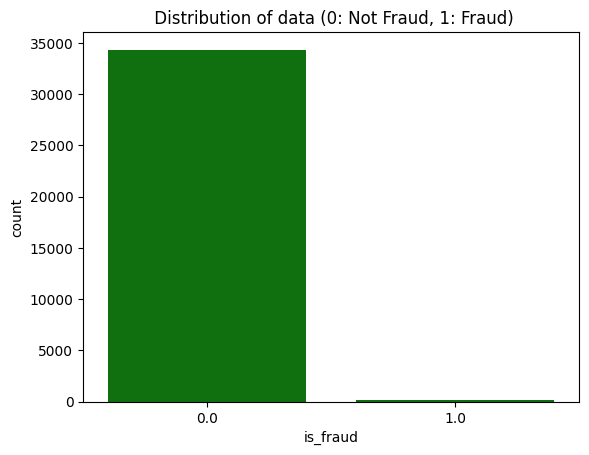

In [ ]:
sns.countplot(x='is_fraud', color='green', data=df_model)
plt.title(' Distribution of data (0: Not Fraud, 1: Fraud)')
plt.show()

In [ ]:

# Define features and target variable
X = df.drop('is_fraud', axis=1)  # Features
y = df['is_fraud']  # Target variable

# Define preprocessing for numerical and categorical features
numeric_features = ['amt', 'city_pop', 'zip']
categorical_features = ['category', 'gender', 'city', 'state', 'job']

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Scale numerical features
        ('cat', OneHotEncoder(), categorical_features)  # One-hot encode categorical features
    ])

X_processed = preprocessor.fit_transform(X)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

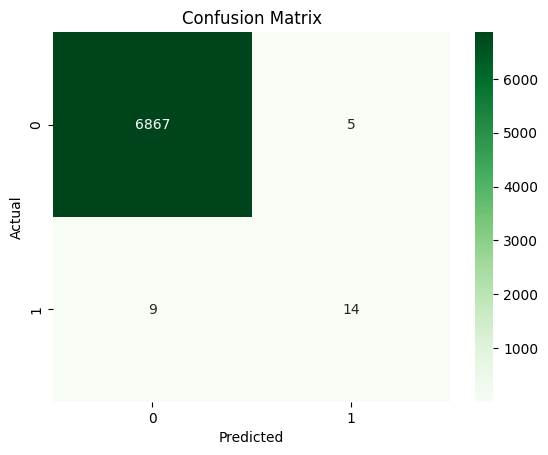

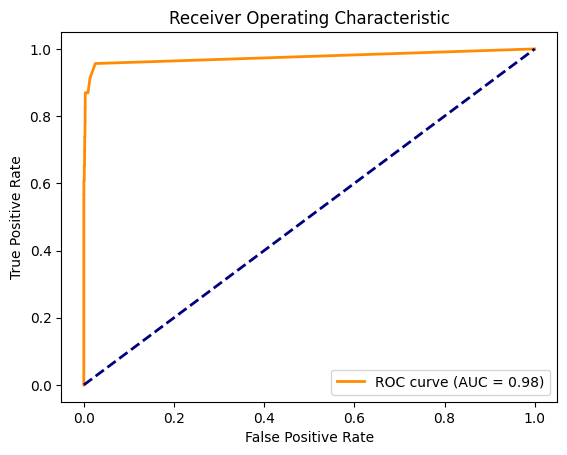

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_score(y_test, y_pred_proba))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6872
         1.0       0.74      0.61      0.67        23

    accuracy                           1.00      6895
   macro avg       0.87      0.80      0.83      6895
weighted avg       1.00      1.00      1.00      6895

ROC AUC Score: 0.9757712456344587


In [ ]:
# making a prediction
new_data = pd.DataFrame({
    'amt': [15099.0],
    'city_pop': [30077099],
    'zip': [84002],
    'category': ['travel'],
    'gender': ['M'],
    'city': ['Columbia'],
    'state': ['NY'],
    'job': ['Curator']
})

# Preprocess the new input
new_data_processed = preprocessor.transform(new_data)

# Make predictions
prediction = model.predict(new_data_processed)
prediction_proba = model.predict_proba(new_data_processed)[:, 1]

# Output the prediction
print("Prediction (0: Not Fraud, 1: Fraud):", prediction[0])
print("Prediction Probability of Fraud:", prediction_proba[0])

Prediction (0: Not Fraud, 1: Fraud): 0.0
Prediction Probability of Fraud: 0.05
